In [417]:
import pandas as pd
import numpy as np

In [418]:
df = pd.read_csv('/content/income.csv')

In [419]:
pd.set_option('display.max_columns', None,
              'display.max_rows', None)

In [420]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [421]:
# Checking data types
df.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [422]:
# Checking for the number of nulls in each column
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [423]:
# Checking for any empty strings in the columns
df.apply(lambda x: x == '').sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [424]:
# Checking the values in the numeric columns
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [426]:
# Checking the unique values for each of the object columns to see if we need
# to change any of the values
for col in df.columns:
  if df[col].dtype != 'int64':
    print(col, '\n', df[col].unique())
    print()

JobType 
 [' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']

EdType 
 [' HS-grad' ' Some-college' ' 9th' ' 11th' ' Assoc-voc' ' Assoc-acdm'
 ' Bachelors' ' 1st-4th' ' Masters' ' 10th' ' 12th' ' 5th-6th'
 ' Prof-school' ' Doctorate' ' 7th-8th' ' Preschool']

maritalstatus 
 [' Divorced' ' Never-married' ' Married-civ-spouse' ' Widowed'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']

occupation 
 [' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']

relationship 
 [' Not-in-family' ' Own-child' ' Husband' ' Other-relative' ' Unmarried'
 ' Wife']

race 
 [' White' ' Black' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Other']

gender 
 [' Female' ' Male']

nativecountry 
 [' United-States' ' Mexico' 

In [427]:
# Encoding the target variable
df.loc[df.SalStat == ' greater than 50,000', 'SalStat'] = 1
df.loc[df.SalStat == ' less than or equal to 50,000', 'SalStat'] = 0

In [428]:
# Checking that the encoding has been done correctly
df['SalStat'].unique()

array([0, 1], dtype=object)

In [429]:
# Enconding the gender variable
df.loc[df.gender == ' Male', 'gender'] = 1
df.loc[df.gender == ' Female', 'gender'] = 0

In [430]:
df.gender.unique()

array([0, 1], dtype=object)

In [431]:
# Replacing the question marks with real nan values
df.loc[df.JobType == ' ?', 'JobType'] = np.nan
df.loc[df.occupation == ' ?', 'occupation'] = np.nan

In [432]:
df.JobType.unique()

array([' Private', ' Federal-gov', nan, ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [433]:
df.occupation.unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', nan, ' Transport-moving', ' Farming-fishing',
       ' Tech-support', ' Other-service', ' Handlers-cleaners',
       ' Protective-serv', ' Priv-house-serv'], dtype=object)

In [434]:
df.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [435]:
# Creating the dummy columns for all of the categorical variables
# that have more than 2 possible values
dummy_cols = [c for c in df.columns if df[c].dtype != 'int64' and c not in ['gender', 'SalStat']]

dummy_cols

['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'nativecountry']

In [436]:
dummy_df = pd.get_dummies(data=df, columns=dummy_cols)

dummy_df.head()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 10th,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,1,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,1,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,1,0,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
dummy_df.dtypes

age                                           int64
gender                                       object
capitalgain                                   int64
capitalloss                                   int64
hoursperweek                                  int64
SalStat                                      object
JobType_ Federal-gov                          uint8
JobType_ Local-gov                            uint8
JobType_ Never-worked                         uint8
JobType_ Private                              uint8
JobType_ Self-emp-inc                         uint8
JobType_ Self-emp-not-inc                     uint8
JobType_ State-gov                            uint8
JobType_ Without-pay                          uint8
EdType_ 10th                                  uint8
EdType_ 11th                                  uint8
EdType_ 12th                                  uint8
EdType_ 1st-4th                               uint8
EdType_ 5th-6th                               uint8
EdType_ 7th-

In [439]:
# Gender and SalStat need to be numeric
dummy_df[['gender', 'SalStat']] = dummy_df[['gender', 'SalStat']].apply(pd.to_numeric)

In [440]:
dummy_df.dtypes

age                                          int64
gender                                       int64
capitalgain                                  int64
capitalloss                                  int64
hoursperweek                                 int64
SalStat                                      int64
JobType_ Federal-gov                         uint8
JobType_ Local-gov                           uint8
JobType_ Never-worked                        uint8
JobType_ Private                             uint8
JobType_ Self-emp-inc                        uint8
JobType_ Self-emp-not-inc                    uint8
JobType_ State-gov                           uint8
JobType_ Without-pay                         uint8
EdType_ 10th                                 uint8
EdType_ 11th                                 uint8
EdType_ 12th                                 uint8
EdType_ 1st-4th                              uint8
EdType_ 5th-6th                              uint8
EdType_ 7th-8th                

In [441]:
# Plotting the correlations between all variables
figure, ax = plt.subplots(figsize=(50, 20), dpi=300)

sns.heatmap(dummy_df.corr())

In [442]:
from sklearn.model_selection import train_test_split

In [443]:
# Dividing the features and target variables
X = dummy_df.drop('SalStat', axis='columns')
y = dummy_df['SalStat']

In [444]:
# Splitting the dataset in training and testing portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

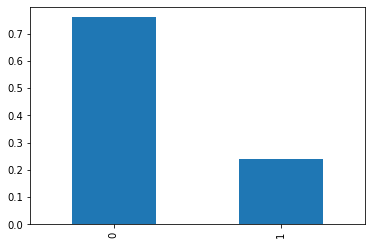

In [445]:
# We have a very imbalanced dataset
df.SalStat.value_counts(normalize=True).plot(kind='bar')

In [446]:
# Casting the y series to integer so we don't get any errors when running the
# model and predicting
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [447]:
from sklearn.ensemble import RandomForestClassifier

In [448]:
# Training the Random Forest
model = RandomForestClassifier(n_jobs=-1, max_depth=19, max_features=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=10, n_jobs=-1)

In [449]:
# Making the predictions
predictions = model.predict(X_test)

In [450]:
from sklearn.metrics import accuracy_score

In [451]:
# Getting the accuracy score
acc_score = accuracy_score(y_test, predictions)

acc_score

0.8622055451323744

In [452]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

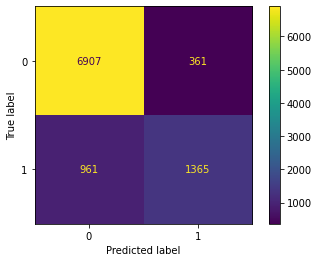

In [453]:
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(cm).plot()

In [454]:
TP = sum((predictions + y_test) == 2)
FP = sum([pred == 1 and true == 0 for pred, true in zip(predictions, y_test)])
TN = sum((predictions + y_test) == 0)
FN = sum([pred == 0 and true == 1 for pred, true in zip(predictions, y_test)])

In [455]:
# Proportion of predicted positives that are actually positive
# (Salary > 50k)
precision = TP / (TP + FP)

precision

0.790845886442642

In [456]:
# Proportion of true positives detected by the model
recall = TP / (TP + FN)

recall

0.5868443680137575

In [457]:
# Proportion of true negatives detected by the model
TN / (TN + FP)

0.9503302146395157

In [458]:
# Calculating f1 score
from sklearn.metrics import f1_score
f1_score_ = f1_score(y_test, predictions)

f1_score_

0.6737413622902271

In [459]:
# Creating a dict that stores the scores of our model
model_scores = {'Accuracy': acc_score,
                'Precision': precision,
                'Recall': recall,
                'F1 score': f1_score_,
                'Model': 'Default model'}

In [460]:
model_scores

{'Accuracy': 0.8622055451323744,
 'Precision': 0.790845886442642,
 'Recall': 0.5868443680137575,
 'F1 score': 0.6737413622902271,
 'Model': 'Default model'}

In [461]:
# Checking what the most importan features are
pd.Series({c: imp for c, imp in zip(X.columns, model.feature_importances_)}).\
sort_values(ascending=False).head()

capitalgain                          0.148655
age                                  0.112880
maritalstatus_ Married-civ-spouse    0.105315
hoursperweek                         0.072027
relationship_ Husband                0.071937
dtype: float64

In [462]:
from imblearn.over_sampling import RandomOverSampler

In [463]:
# Oversampling the minority class to balance the training data
ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)

# Checking the distribution of the target column for the new dataset
y_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: SalStat, dtype: float64

In [464]:
# Number of duplicate rows in the feature dataset before oversampling
X.duplicated().sum()

4066

In [465]:
# A lot of duplicates introduced by over sampling the minority class
# Most of the new duplicates should be for the minority class (income > 50k)
X_ros.duplicated().sum()

20654

In [466]:
# Splitting the dataset in training and testing portions
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

In [467]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [468]:
# Initializing and fitting the model
model = RandomForestClassifier(n_jobs=-1,)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [469]:
# Making the predictions
predictions = model.predict(X_test)

In [470]:
# Dict to store the new model's scores
ros_model = {}

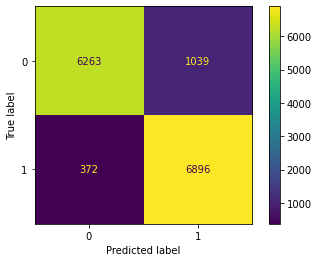

In [471]:
# New confusion matrix for the oversampled model
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(cm).plot()

In [472]:
# Getting the accuracy score
ros_model['Accuracy'] = accuracy_score(y_test, predictions)

In [473]:
TP = sum((predictions + y_test) == 2)
FP = sum([pred == 1 and true == 0 for pred, true in zip(predictions, y_test)])
TN = sum((predictions + y_test) == 0)
FN = sum([pred == 0 and true == 1 for pred, true in zip(predictions, y_test)])

Compare these scores with the previous ones:
- We predict the majority class a bit worse
- We predict the minority class significantly better

In [474]:
# Proportion of predicted positives that are actually positive
# (Salary > 50k)
precision = TP / (TP + FP)

ros_model['Precision'] = precision

In [475]:
# Proportion of true positives detected by the model
recall = TP / (TP + FN)

ros_model['Recall'] = recall

In [476]:
# Proportion of true negatives detected by the model
TN / (TN + FP)

0.8577102163790742

In [477]:
# Proportion of predicted negatives that are actually negatives
TN / (TN + FN)

0.943933685003768

In [478]:
ros_model['F1 score'] = f1_score(y_test, predictions)
ros_model['Model'] = 'Oversampled model'

In [479]:
ros_model

{'Accuracy': 0.9031571722717914,
 'Precision': 0.8690611216131064,
 'Recall': 0.9488167308750688,
 'F1 score': 0.9071893705189764,
 'Model': 'Oversampled model'}

In [480]:
model_scores

{'Accuracy': 0.8622055451323744,
 'Precision': 0.790845886442642,
 'Recall': 0.5868443680137575,
 'F1 score': 0.6737413622902271,
 'Model': 'Default model'}

In [481]:
scores_df = pd.DataFrame([model_scores, ros_model])

In [482]:
melted_df = pd.melt(scores_df, 
                    id_vars='Model', var_name='Score_type',
                    value_vars=scores_df.columns[:-1])

melted_df

,Model,Score_type,value
0,Default model,Accuracy,0.862206
1,Oversampled model,Accuracy,0.903157
2,Default model,Precision,0.790846
3,Oversampled model,Precision,0.869061
4,Default model,Recall,0.586844
5,Oversampled model,Recall,0.948817
6,Default model,F1 score,0.673741
7,Oversampled model,F1 score,0.907189


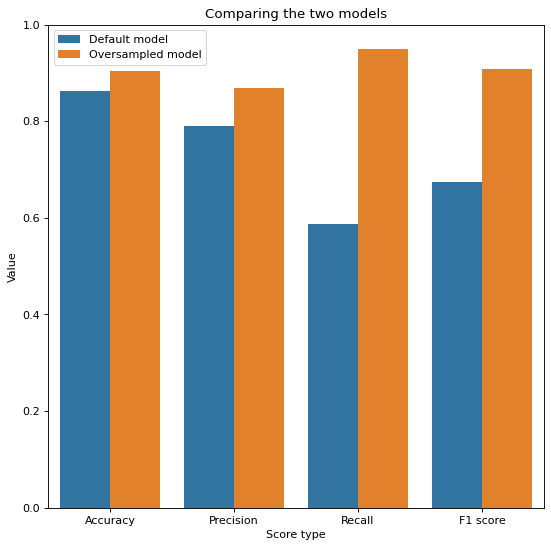

In [483]:
# Creating a barplot to compare the two models's scores
figure, ax = plt.subplots(figsize=(8, 8), dpi=80)

sns.barplot(data=melted_df, x='Score_type', y='value', hue='Model')

plt.ylim(0, 1)
plt.legend(loc='best')

plt.xlabel('Score type')
plt.ylabel('Value')
plt.title('Comparing the two models')

plt.savefig('Model comparison.png', dpi=300)